In [1]:
import tensorflow as tf
import os
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import albumentations as A
from augment import ImageAugmentor

In [3]:
transform = A.Compose([
    A.Resize(64, 64),
    # Rotation + random zoom-in/out 
    A.Affine(
        scale=(0.80, 1.20),                     # tăng mạnh scale distortion
        translate_percent=(0.05, 0.15),         # cho phép dịch vị trí lớn
        rotate=(-25, 25),                       # xoay mạnh hơn
        shear=(-15, 15),                        # thêm shear distortion
        p=0.8
    ),
    # Variation ngẫu nhiên tạo cảm giác vẽ nguệch ngoạc
    A.ElasticTransform(alpha=30, sigma=8, p=0.4),
    # Méo dạng đoạn grid (rất phù hợp sketch recognition)
    A.GridDistortion(num_steps=5, distort_limit=0.35, p=0.4),
    # Flip giữ nhỏ để tránh phá meaning (optional)
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.3),
])
data_path = "preprocessed data"
output_path = "augmented_data3"
num = 4
image_augmentor = ImageAugmentor(data_path, output_path, num, transform)
image_augmentor.augment_single_img()
print(image_augmentor.count)

Save successfully augment of image  apple_1.jpeg
Save successfully augment of image  apple_2.jpeg
Save successfully augment of image  apple_3.jpeg
Save successfully augment of image  apple_4.jpeg
Save successfully augment of image  apple_5.jpeg
Save successfully augment of image  apple_6.jpeg
Save successfully augment of image  apple_7.jpeg
Save successfully augment of image  apple_8.jpeg
Save successfully augment of image  apple_9.jpeg
Save successfully augment of image  apple_10.jpeg
Save successfully augment of image  apple_11.jpeg
Save successfully augment of image  apple_12.jpeg
Save successfully augment of image  apple_13.jpeg
Save successfully augment of image  apple_14.jpeg
Save successfully augment of image  apple_15.jpeg
Save successfully augment of image  apple_16.jpeg
Save successfully augment of image  apple_17.jpeg
Save successfully augment of image  apple_18.jpeg
Save successfully augment of image  apple_19.jpeg
Save successfully augment of image  apple_20.jpeg
Save succ

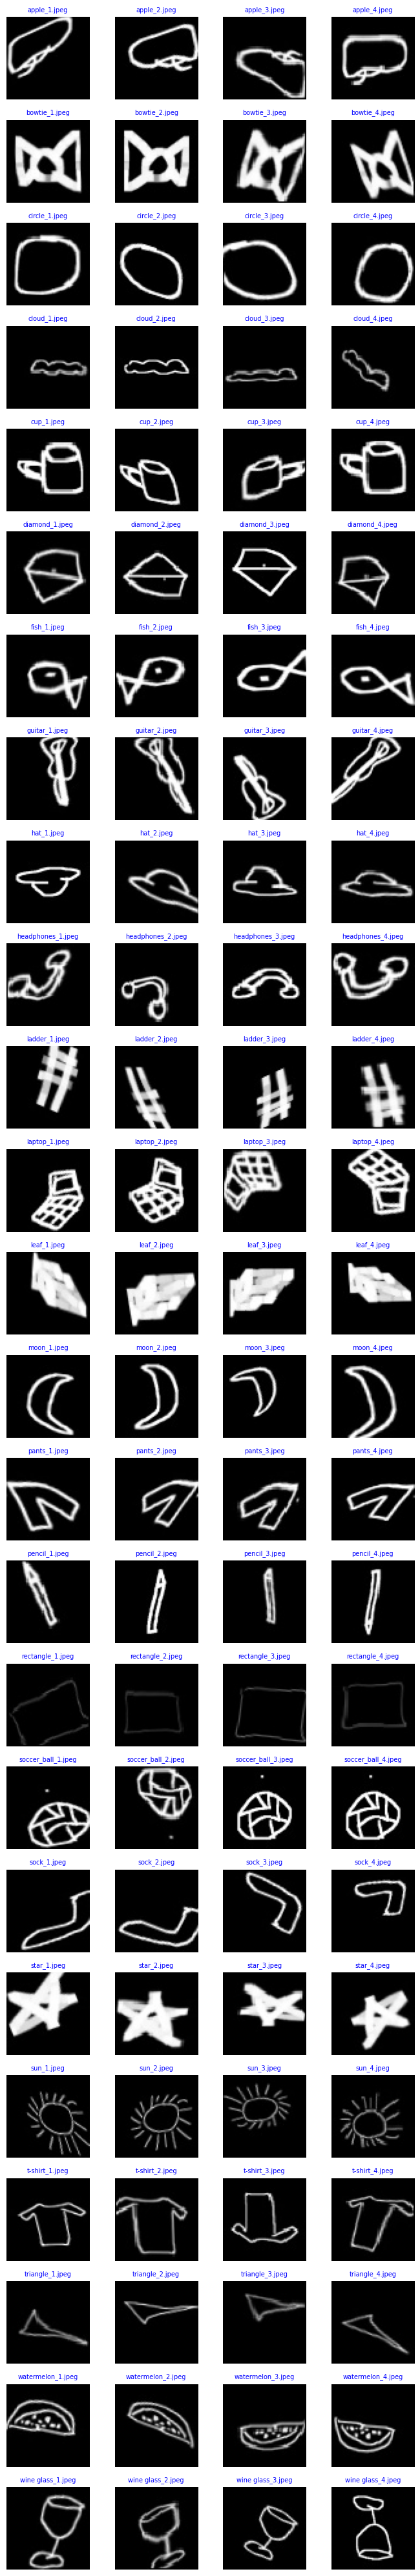

In [4]:
output_path = "augmented_data3"
folders = os.listdir(output_path)
images = []
for fold in folders:
    filespath = os.path.join(output_path, fold)
    files = os.listdir(filespath)
    files = sorted(files, key=lambda x: int(x.split("_")[-1].split(".")[0])) # VD: "apple_10.jpeg" -> ["apple", "10.jpeg"] -> ["10", "jpeg"] -> 10
    for i in range(4):
        images.append(os.path.join(filespath, files[i]))
# figsize = (columns * 1.5, rows * 1.5)
# subplot(row, col)
plt.figure(figsize=(7, 40))
for i in range(100):
    plt.subplot(25, 4, i + 1)
    img = cv2.imread(images[i])
    plt.imshow(img)
    name = images[i].split("\\")[-1]
    plt.title(label=name, color='blue', fontsize=7)
    plt.axis('off')
plt.tight_layout()
plt.show()